# Cox regression

Start from a linear model. Build up a Cox regression using simulation.

In [3]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import os
from lifelines import CoxPHFitter
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys

from tqdm import tqdm

pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)
sns.set_context('talk')
pd.set_option('display.max_columns', None)
%matplotlib inline

# Simulate a dataset starting from a linear model

The [Cox model](https://en.wikipedia.org/wiki/Proportional_hazards_model) is defined as:
$$  {\displaystyle {\begin{aligned}\lambda (t|X_{i})&=\lambda _{0}(t)\exp(\beta _{1}X_{i1}+\cdots +\beta _{p}X_{ip})\\&=\lambda _{0}(t)\exp(X_{i}\cdot \beta )\end{aligned}}} $$

Therefore, for some individual, with a given set of covariates, there is a hazard function at time t.

Let's start super simple and just do one covariate, say gender. Imagine that being male increases risk factor for a disease. Specifically, we'll assign a coefficient of 0.5 for gender. Therefore a positive coefficient leads to an increased **hazard ratio** (?). When x = 0 (female) the hazard ratio is simply the baseline hazard ratio, whereas when it is 0.5, the 

 Start with a simple linear model. Remember that there are no intercepts.

$$ y = \beta x $$ 

In [7]:
# Simulate 100 samples

beta = 0.5
x = stats.binom.rvs(n=1, p=0.5, size=100)   # create a vector for gender
y = beta*x

Now we need to account for a baseline hazard rate. The hazard rate is the probability of an instaneous failure given that it has survived up to time t. Let's assume the hazard rate is constant, regardless of time. Assume that failure happens at a rate of 0.25 per month or $\lambda = 0.25 $. We can even write $\lambda(t) = 0.25 $ but it will always be 0.25 regardless of t.

Text(0.5, 1.0, 'Distribution of survival times with baseline hazard')

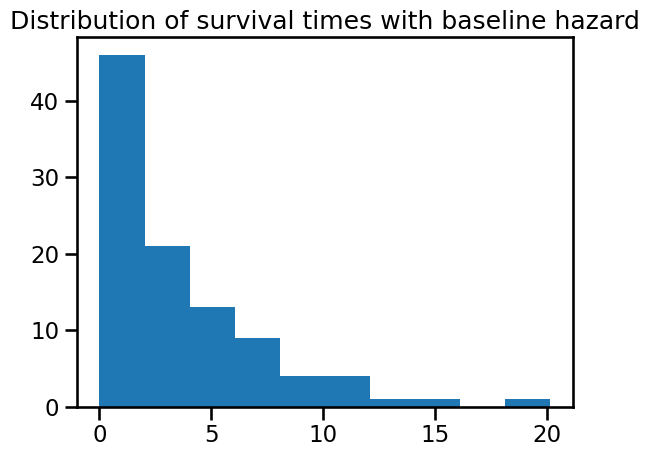

In [41]:
# Assume it can be modeled with an exponential distribution

lam_b = 0.25  # lam_b = lamda of baseline
samples_with_baseline_hazard = stats.expon.rvs(scale=1/lam, size=100)
plt.hist(samples_with_baseline_hazard)
plt.title("Distribution of survival times with baseline hazard")

In [31]:
# get the mean from the samples
np.mean(samples_from_exponential_dist)

3.904678456212506

Mean is also defined as 1/lambda, which makes sense because if things are dying at a rate of once per month, then the average survival time is 1/0.25 or 4 months. This is the definition of the mean in an exponential distribution.

In [33]:
# close to above
1/lam

4.0

Now how do we translate this to our Cox model? How do we see the "shift" in baseline caused by the covariates. Recall that our baseline is a constant. Therefore, we just need to see how the baseline shifts.

In [40]:
lam_n = lam_b * np.exp(beta * 1)   # 1 is male  # lambda new
print(lam_n)

0.41218031767503205


Now let's see how the survival times compare. Remember we're now seeing an increase in lambda, so we expect more failures, or a smaller survival time on average.

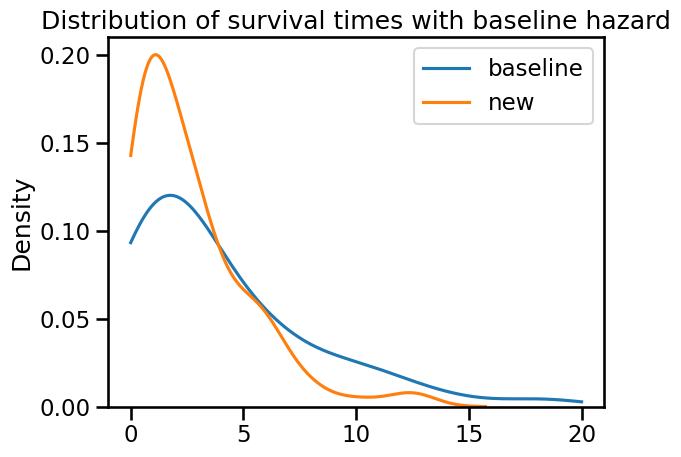

In [52]:
samples_with_baseline_hazard = stats.expon.rvs(scale=1/lam_b, size=100)
samples_with_new_hazard = stats.expon.rvs(scale=1/lam_n, size=100)
#plt.hist(samples_with_baseline_hazard)
sns.kdeplot(samples_with_baseline_hazard, clip=(0, 20), label='baseline')
sns.kdeplot(samples_with_new_hazard, clip=(0, 20), label='new')
plt.title("Distribution of survival times with baseline hazard")
plt.legend()

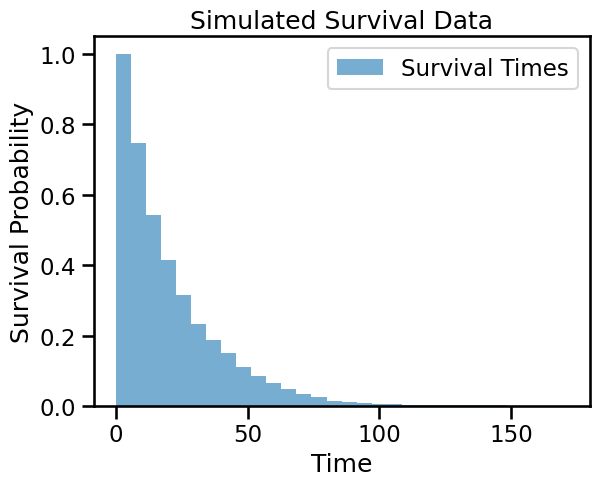

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(0)

# Define the baseline hazard function
def baseline_hazard(t):
    return 0.05  # You can customize this function

# Set the time range for simulation
t_max = 10  # Maximum time
num_samples = 1000  # Number of samples

# Generate random survival times based on the baseline hazard
survival_times = np.random.exponential(scale=1.0 / baseline_hazard(t_max), size=num_samples)

# Sort the survival times
survival_times.sort()

# Plot the survival times
plt.hist(survival_times, bins=30, density=True, cumulative=-1, label='Survival Times', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Simulated Survival Data')
plt.legend()
plt.show()
